# Training and Testing DQN Agents in Gym Environments

### Imports

In [1]:
from agent_utils import *
# Lazy, I know but this will be refined!

### The Cartpole

Environment details can be found [here](https://gymnasium.farama.org/environments/classic_control/cart_pole/)

In [2]:
# Initialise Environment and set up Agent
env = gym.make('CartPole-v1', render_mode='rgb_array')
cartpole_agent = Agent(env)

In [3]:
# Set up the DQN parameters

input_size = cartpole_agent.env.observation_space.shape[0]
output_size = cartpole_agent.env.action_space.n

# DQN Parameters
layers = [input_size, 64, 64, output_size]  # DQN Architecture
activation = 'relu'
weights = 'xunif'
optim = 'Adam'
learning_rate = 1e-3
dqn_params = dict(layers=layers, activation=activation, weights=weights, optim=optim, learning_rate=learning_rate)

In [4]:
# Set up the Training Parameters
epsilon = 1 # The epsilon at the start of learning
eps_decay = 0.995  # Epsilon is reduced by 1-eps_decay every episode
replay_buffer = 100000
batch_size = 64
epsilon_end = 0.01
episodes = 1000
update_frequency = 5
clip_rewards = False
gamma = 1 # No discount used

# Aggregate them into a dict for mapping

training_params = dict(epsilon=epsilon, eps_decay=eps_decay, replay_buffer=replay_buffer,
                           batch_size=batch_size, epsilon_end=epsilon_end, episodes=episodes,
                           update_frequency=update_frequency, dqn_params=dqn_params, clip_rewards=clip_rewards)


In [5]:
# Show a random rendering
cartpole_agent.save_random_renders(episodes=1,plots=False,save_every=1,nb_render=True)

saving a random render
Random episode 1 with reward 24.0
24 steps


<img src="images/CartPole-v1/random.gif" width="750" align="center" />

In [6]:
# Train Agent
run_stats = cartpole_agent.train_agent(show_time=True, **training_params)

Training DQN Agent...
episode  100 of max 1000
episode  200 of max 1000
episode  300 of max 1000
episode  400 of max 1000
episode  500 of max 1000
episode  600 of max 1000
Environment solved within 667 episodes.
Average Score: 477.82
Training is complete
Execution time: 57.0 minutes, 24.262845039367676 seconds.


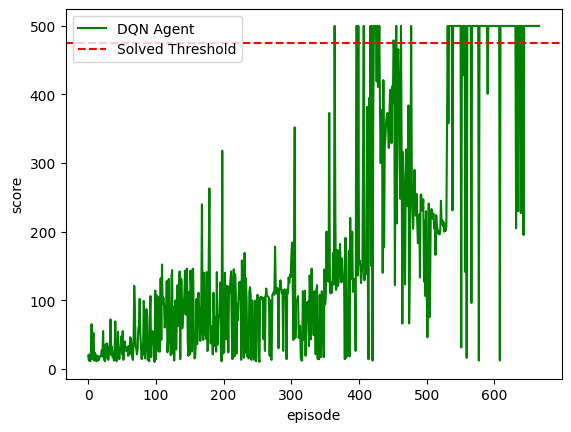

In [7]:
# Plot Training curve
cartpole_agent.plot_episodes(run_stats['episode_rewards'])

In [8]:
# Show a trained rendering
cartpole_stats=cartpole_agent.evaluate_agent(1, plots=False, save_every=1,nb_render=True)

Evaluating Trained Agent...
Episode 1 with reward 500.0
500 steps


<img src="images/CartPole-v1/evaluation.gif" width="750" align="center" />

### The Lunar Lander

Environment details can be found [here](https://gymnasium.farama.org/environments/box2d/lunar_lander/)

In [9]:
# Initialise Environment and set up Agent
env = gym.make("LunarLander-v2", render_mode='rgb_array')
lunar_agent = Agent(env)

In [10]:
# Set up the DQN parameters
input_size = lunar_agent.env.observation_space.shape[0]
output_size = lunar_agent.env.action_space.n

# DQN Parameters
layers = [input_size, 256, 128, output_size]  # DQN Architecture
activation = 'relu'
weights = 'xunif'
optim = 'Adam'
learning_rate = 1e-4
dqn_params = dict(layers=layers, activation=activation, weights=weights, optim=optim, learning_rate=learning_rate)

In [11]:
# Training Parameters
epsilon = 1
eps_decay = 0.995  # Epsilon is reduced by 1-eps_decay every episode
replay_buffer = 100000
batch_size = 64
epsilon_end = 0.01
episodes = 2000
update_frequency = 5
clip_rewards = False
gamma = 1

# Aggregate them into a dict for mapping
training_params = dict(epsilon=epsilon, eps_decay=eps_decay, replay_buffer=replay_buffer,
                       batch_size=batch_size, epsilon_end=epsilon_end, episodes=episodes,
                       update_frequency=update_frequency, dqn_params=dqn_params, clip_rewards=clip_rewards,
                       gamma=gamma)

In [12]:
# Show a random rendering
lunar_agent.save_random_renders(episodes=1,plots=False,save_every=1,nb_render=True)

saving a random render
Random episode 1 with reward -175.4331997440275
78 steps


<img src="images/LunarLander-v2/random.gif" width="750" align="center" />

In [13]:
# Train Agent
run_stats = lunar_agent.train_agent(show_time=True, **training_params)

Training DQN Agent...
episode  200 of max 2000
episode  400 of max 2000
Environment solved within 531 episodes.
Average Score: 200.20559720037718
Training is complete
Execution time: 11.0 minutes, 49.38861298561096 seconds.


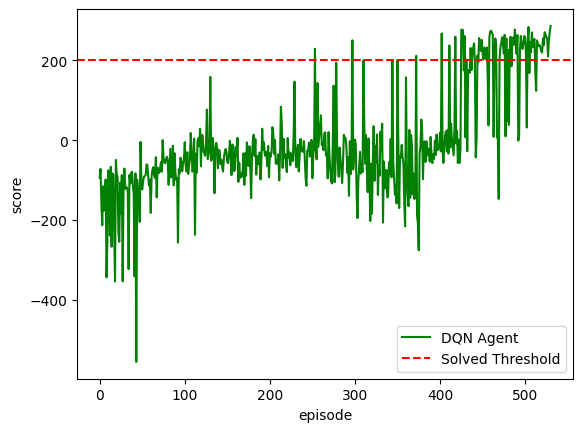

In [14]:
# Plot Training curve
lunar_agent.plot_episodes(run_stats['episode_rewards'])

In [16]:
# Show a trained rendering
lunar_stats=lunar_agent.evaluate_agent(1, plots=False, save_every=1,nb_render=True)

Evaluating Trained Agent...
Episode 1 with reward 293.35974285113406
374 steps


<img src="images/LunarLander-v2/evaluation.gif" width="750" align="center" />

### The Mountain Car

Environment details can be found [here](https://gymnasium.farama.org/environments/classic_control/mountain_car/)